## Case Study on Analysis of Startup Funding

### *Analyst: Anuj Popli*
### *Contact info: anuj_popli999@yahoo.com*

### About this analysis:
#### This dataset has funding information of Indian startups from January 2015 to August 2017. It contains 10 columns and 3044 rows. This dataset will be used to determine:
>1. Important investors
>2. Categories of startups getting the most funds
>3. Trend of investments
>4. Impact of geography on investments
>5. Investment category analysis
>6. Startups which received highest funding and had highest funding rounds.
#### The above mentioned points are just the highlights of insights to be determined, however, each problem statement is discussed in detail in the following section.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_stfund = pd.read_csv('startup_funding.csv')

In [6]:
df_stfund.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
df_stfund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [8]:
df_stfund.shape

(3044, 10)

In [9]:
df_stfund.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

#### Renaming columns to ease in processing

In [10]:
df_stfund.rename(columns={"Sr No":"sr_no", "Date dd/mm/yyyy":"date","Startup Name":"startup_name","Industry Vertical":"industry_vert","SubVertical":"sub_vert","City  Location":"city","Investors Name":"inv_name","InvestmentnType":"inv_type","Amount in USD":"amt_USD"},inplace=True)

In [11]:
df_stfund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sr_no          3044 non-null   int64 
 1   date           3044 non-null   object
 2   startup_name   3044 non-null   object
 3   industry_vert  2873 non-null   object
 4   sub_vert       2108 non-null   object
 5   city           2864 non-null   object
 6   inv_name       3020 non-null   object
 7   inv_type       3040 non-null   object
 8   amt_USD        2084 non-null   object
 9   Remarks        419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### Problem Statement-1:
#### Check the trend of investments over the years.


In [12]:
# to_datetime is used here to convert to date, here errors are set to coerce so that any date
# which is not converted successfully will be changed to NaT or Not a Time value.

df_stfund['correct_date'] = pd.to_datetime(df_stfund['date'],format="%d/%m/%Y",errors='coerce')

In [13]:
# Checking and creating a boolean series for null/NaT values

bool_d = pd.isnull(df_stfund['correct_date'])
bool_d

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: correct_date, Length: 3044, dtype: bool

In [14]:
df_stfund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sr_no          3044 non-null   int64         
 1   date           3044 non-null   object        
 2   startup_name   3044 non-null   object        
 3   industry_vert  2873 non-null   object        
 4   sub_vert       2108 non-null   object        
 5   city           2864 non-null   object        
 6   inv_name       3020 non-null   object        
 7   inv_type       3040 non-null   object        
 8   amt_USD        2084 non-null   object        
 9   Remarks        419 non-null    object        
 10  correct_date   3036 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 261.7+ KB


In [15]:
# Generating dataframe by filtering for null values in date column by utilizing bool_d series created above

df_stfund[bool_d]

,sr_no,date,startup_name,industry_vert,sub_vert,city,inv_name,inv_type,amt_USD,Remarks,correct_date
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000",NaN,NaT
2571,2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,"6,30,000",NaN,NaT
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",NaN,NaT
2775,2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN,NaN,NaT
2776,2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000",NaN,NaT
2831,2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000",NaN,NaT
3011,3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000",NaN,NaT
3029,3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000",NaN,NaT


In [16]:
# Creating a dictionary of wrong dates and correct dates to be mapped later

correctdates = {"05/072018":"05/07/2018",
                "01/07/015":"01/07/2015",
                "\\xc2\\xa010/7/2015":"10/7/2015",
                "12/05.2015":"12/05/2015",
                "12/05.2015":"12/05/2015",
                "13/04.2015":"13/04/2015",
                "15/01.2015":"15/01/2015",
                "22/01//2015":"22/01/2015"}

In [17]:
# Filling the NaT values with correct dates using the dictionary correctdates created above

df_stfund['correct_date'] = df_stfund['correct_date'].fillna((df_stfund['date'].map(correctdates)))

In [18]:
#Checking further for NaT

np.isnat(df_stfund['correct_date']).sum()

1

In [19]:
bool_d1 = pd.isnull(df_stfund['correct_date'])
bool_d1

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: correct_date, Length: 3044, dtype: bool

In [20]:
df_stfund[bool_d1]

,sr_no,date,startup_name,industry_vert,sub_vert,city,inv_name,inv_type,amt_USD,Remarks,correct_date
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",NaN,NaT


In [21]:
#Fixing the last NaT value

df_stfund.loc[2606,'date']=df_stfund.loc[2606,'date'].replace("\\\\xc2\\\\xa0","")

In [22]:
df_stfund[bool_d1]

,sr_no,date,startup_name,industry_vert,sub_vert,city,inv_name,inv_type,amt_USD,Remarks,correct_date
2606,2607,10/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",NaN,NaT


In [23]:
# Creating a new column 'year' and filling in the values by getting the year out of the correct_date column

df_stfund['year'] = df_stfund['correct_date'].dt.year

In [24]:
# Getting the occurrence of each year in the year column

df_stfund['year'].value_counts()

year
2016.0    993
2015.0    935
2017.0    687
2018.0    310
2019.0    111
2020.0      7
Name: count, dtype: int64

In [25]:
sorted(df_stfund['year'].value_counts().index)

[2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0]

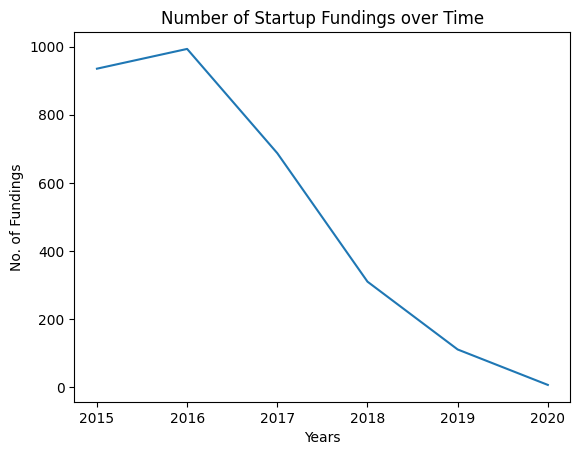

In [221]:
# Line plot showing the trend of startups over time

a = sns.lineplot(x=df_stfund['year'].value_counts().index, y=df_stfund['year'].value_counts().values)
a.set_xlabel("Years")
a.set_ylabel("No. of Fundings")
a.set_title("Number of Startup Fundings over Time")
plt.show()

### Problem Statement-2:
#### Find top 10 Indian cities which have most number of startups ? Plot a pie chart and visualise it.

In [28]:
# Getting the unique values in column city 

df_stfund['city'].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

In [29]:
# Creating a new column 'corr_city' using column 'city'

df_stfund['corr_city'] = df_stfund['city']

#### Below, correcting the city names in corr_city column.
#### Example: Andheri, Chembur are part of Mumbai, so updating these values to Mumbai
#### Example: If a city has one Indian and one foreign name, then updating the value to just keep Indian city. Like Mumbai/UK to Mumbai
#### Example: Replacing wrongly spelled words with correct spellings. Gurgaon to Gurugram
#### Example: Karnataka to Bengaluru as Karnataka is a state and because we are dealing with cities, so the closest correct city should be the capital city of that state.

In [30]:
df_stfund['corr_city'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai'])

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: corr_city, Length: 3044, dtype: bool

In [31]:
df_stfund[df_stfund['corr_city'].isin(['\\\\xc2\\\\xa0Mumbai'])].index

Index([2608], dtype='int64')

In [32]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['\\\\xc2\\\\xa0Mumbai'])].index,'corr_city'] = 'Mumbai'

In [33]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Andheri','Chembur','Mumbai / UK','Mumbai / NY','Mumbai / Global'])].index,'corr_city'] = 'Mumbai'

In [34]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['\\\\xc2\\\\xa0Gurgaon','Gurgaon',"Gurgaon / SFO"])].index,'corr_city'] = 'Gurugram'

In [35]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['\\\\xc2\\\\xa0Noida','Noida / Singapore',])].index,'corr_city'] = 'Noida'

In [36]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Kormangala','Karnataka','New York, Bengaluru','Bangalore','Bangalore/ Bangkok','SFO / Bangalore','Seattle / Bangalore','Bangalore / SFO','Bangalore / Palo Alto','Bangalore / San Mateo','Bangalore / USA','\\\\xc2\\\\xa0Bangalore'])].index,'corr_city'] = 'Bengaluru'

In [37]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Delhi','Delhi & Cambridge','Nw Delhi','New Delhi / US','New Delhi/ Houston','\\\\xc2\\\\xa0New Delhi','New Delhi / California'])].index,'corr_city'] = 'New Delhi'

In [38]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Taramani','Chennai/ Singapore',])].index,'corr_city'] = 'Chennai'

In [39]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Hyderabad/USA','Dallas / Hyderabad'])].index,'corr_city'] = 'Hyderabad'

In [40]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Pune/Seattle','Pune / Dubai','Pune / US','Pune / Singapore'])].index,'corr_city'] = 'Pune'

In [41]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Bhubneswar'])].index,'corr_city'] = 'Bhubaneswar'

In [42]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Ahemadabad','Ahemdabad'])].index,'corr_city'] = 'Ahmedabad'

In [43]:
df_stfund.loc[df_stfund[df_stfund['corr_city'].isin(['Kolkatta'])].index,'corr_city'] = 'Kolkata'

In [44]:
# City names with number of startups
df_stfund['corr_city'].value_counts().head(10)

corr_city
Bengaluru    855
Mumbai       573
New Delhi    464
Gurugram     342
Pune         112
Hyderabad    101
Chennai       99
Noida         94
Ahmedabad     41
Jaipur        30
Name: count, dtype: int64

In [45]:
values = list((df_stfund['corr_city'].value_counts()).head(10))
values

[855, 573, 464, 342, 112, 101, 99, 94, 41, 30]

In [46]:
labels = list(df_stfund['corr_city'].value_counts().head(10).index)
labels

['Bengaluru',
 'Mumbai',
 'New Delhi',
 'Gurugram',
 'Pune',
 'Hyderabad',
 'Chennai',
 'Noida',
 'Ahmedabad',
 'Jaipur']

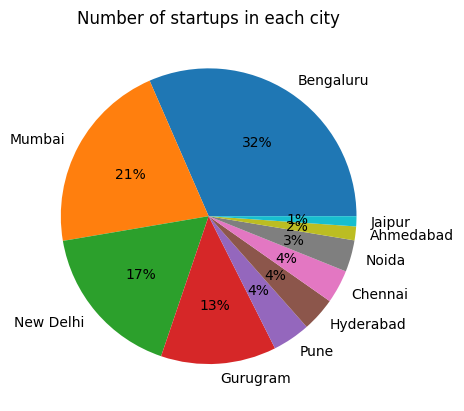

In [47]:
# Pie chart showing the percentage of startups in various cities

plt.pie(values,labels=labels,autopct='%.0f%%')
plt.title("Number of startups in each city")
plt.show()

### Problem Statement-3:
#### Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

In [48]:
# Creating a new column 'correct_amt_USD' from 'amt_USD' to aid in processing

df_stfund['correct_amt_USD'] = df_stfund['amt_USD'].astype(str)

In [49]:
df_stfund['correct_amt_USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

#### Replacing the unwanted characters in correct_amt_USD column

In [50]:
df_stfund['correct_amt_USD'] = df_stfund['correct_amt_USD'].map(lambda x:x.replace('\\xc2\\xa0',''))

In [51]:
df_stfund['correct_amt_USD'] = df_stfund['correct_amt_USD'].map(lambda x:x.replace('\\\\xc2\\\\xa0',''))

In [52]:
df_stfund['correct_amt_USD'] = df_stfund['correct_amt_USD'].map(lambda x:x.replace(',',''))

In [53]:
df_stfund['correct_amt_USD'] = df_stfund['correct_amt_USD'].map(lambda x:x.replace('+',''))

In [54]:
# Converting string values to numeric (float)

df_stfund['correct_amt_USD'] = pd.to_numeric(df_stfund['correct_amt_USD'],errors='coerce',downcast='float')

In [55]:
# Checking null values and assigning to bool_d2

bool_d2 = pd.isnull(df_stfund['correct_amt_USD'])
bool_d2

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042     True
3043    False
Name: correct_amt_USD, Length: 3044, dtype: bool

### Now, we have around 30% null values in correct_amt_USD column, which is a large number. To fix these values, we can simply replace these null values with 0 or mean of entire column. But, this will not give an accurate representation.
### Therefore, it is decided to get the mean of each industry type and assign it to each null value corresponding to the industry type. This way we get a realistic and better picture of funding received.

### Therefore, industry vertical column is processed below.

In [56]:
df_stfund['industry_vert'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [57]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].astype(str)

#### Replacing the unwanted characters in industry_vert column

In [58]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\\\xc2\\\\xa0',''))

In [59]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\xe2\\x80\\x93',''))

In [60]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\\\n',' '))

In [61]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\\\xe2\\\\x80\\\\x99',''))

In [62]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\\\xc3\\\\xa9','e'))

In [63]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99','e'))

In [64]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('Chain of Tea Cafs','Chain of Tea Cafes'))

In [65]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('Dcor','Decor'))

In [66]:
df_stfund['industry_vert'] = df_stfund['industry_vert'].map(lambda x:x.replace('dcor','decor'))

#### Fixing wrongly spelled with correct values

In [67]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['E-commerce','ECommerce','Ecommerce','eCommerce','ecommerce','eCommece'])].index,'industry_vert'] = 'E-Commerce'


In [68]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Beauty and Wellness platform'])].index,'industry_vert'] = 'Beauty and Wellness Platform'

In [69]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Clean-tech'])].index,'industry_vert'] = 'Clean Tech'

In [70]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Consumer Interne','Consumer internet'])].index,'industry_vert'] = 'Consumer Internet'

In [71]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Crowd funding platform'])].index,'industry_vert'] = 'Crowd Funding Platform'

In [72]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Ed-tech','EdTech','Edtech'])].index,'industry_vert'] = 'Ed-Tech'

In [73]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Electric Scooter manufacturer'])].index,'industry_vert'] = 'Electric Scooter Manufacturer'

In [74]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Fiinance'])].index,'industry_vert'] = 'Finance'

In [75]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Fin-Tech','Financial Tech','Fintech'])].index,'industry_vert'] = 'FinTech'

In [76]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Food & Beverages','Food and Beverage','Food and Beverages'])].index,'industry_vert'] = 'Food & Beverage'

In [77]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Food Delivery platform'])].index,'industry_vert'] = 'Food Delivery Platform'

In [78]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Food Tech'])].index,'industry_vert'] = 'Food-Tech'

In [79]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Healthcare','healthcare'])].index,'industry_vert'] = 'Health Care'

In [80]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Health and wellness'])].index,'industry_vert'] = 'Health and Wellness'

In [81]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Hyperlocal Handyman services'])].index,'industry_vert'] = 'Hyperlocal Handyman Services'

In [82]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['On-Demand Beauty Services'])].index,'industry_vert'] = 'On-Demand Beauty Service'

In [83]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Online Food ordering & Delivery platform'])].index,'industry_vert'] = 'Online Food Ordering & Delivery Platform'

In [84]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Online Grocers'])].index,'industry_vert'] = 'Online Grocer'

In [85]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Online Jewelry Store'])].index,'industry_vert'] = 'Online Jewellery Store'

In [86]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Payments Solution platform'])].index,'industry_vert'] = 'Payment Solutions platform'

In [87]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Preventive healthcare services'])].index,'industry_vert'] = 'Preventive Healthcare Services'

In [88]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Saas'])].index,'industry_vert'] = 'SaaS'

In [89]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Transport'])].index,'industry_vert'] = 'Transportation'

In [90]:
df_stfund.loc[df_stfund[df_stfund['industry_vert'].isin(['Used Vehicles Marketplace'])].index,'industry_vert'] = 'Used Vehicle Marketplace'

In [91]:
z=list(df_stfund['industry_vert'].unique())
z.sort()
z

['360-degree view creating platform',
 '3D Printer Manufacturer',
 'AI',
 'API Workflow platform',
 'Accounting',
 'Activity Based Social Network',
 'Advertising & Marketing Community Networking platform',
 'Advertising, Marketing',
 'Aerospace',
 'Affordable Education',
 'Affordable Hotel Booking Online',
 'Agriculture',
 'Agtech',
 'Algorithmic Match Making Platform',
 'Alternate Mobile Monetization platform',
 'App Analytics platform',
 'App based Bus Pooling Services',
 'App based Fitness coaching',
 'App security testing platform',
 'Architectural Design & Consulting',
 'Artificial Intelligence',
 'Artificial Intelligence Ecommerce Chatbot',
 'Artificial Intelligence platform',
 'Artist / Designer Marketplace',
 'Asset Financing platform',
 'Auto',
 'Auto Insurance Online platform',
 'Auto Rickshaw Based Services',
 'Auto Rickshaw based Logistics',
 'Automated Storage & Warehousing Solution',
 'Automation',
 'Automobile',
 'Automotive',
 'Automotive Services platform',
 'Autoricks

#### Some more pre-processing below:

In [92]:
a=df_stfund.groupby('industry_vert').sum('correct_amt_USD')
a

,sr_no,year,correct_amt_USD
industry_vert,,,
360-degree view creating platform,2322,2015.0,0.0
3D Printer Manufacturer,2716,2015.0,3000000.0
AI,113,2019.0,0.0
API Workflow platform,2804,2015.0,1000000.0
Accounting,44,2019.0,5000000.0
...,...,...,...
solar products and services marketplace,2557,2015.0,0.0
us ticketing and fleet management platform,2294,2015.0,0.0
usiness expense management,2854,2015.0,500000.0


In [93]:
a.loc[:,'correct_amt_USD']

industry_vert
360-degree view creating platform                                 0.0
3D Printer Manufacturer                                     3000000.0
AI                                                                0.0
API Workflow platform                                       1000000.0
Accounting                                                  5000000.0
                                                              ...    
solar products and services marketplace                           0.0
us ticketing and fleet management platform                        0.0
usiness expense management                                   500000.0
virtual reality, 3d simulation and stereoscopic products     800000.0
visual search and discovery platform                        1000000.0
Name: correct_amt_USD, Length: 786, dtype: float64

#### Filtering out data, where the correct_amt_USD is null

In [94]:
b=df_stfund[bool_d2].groupby('industry_vert').sum('correct_amt_USD')
b

,sr_no,year,correct_amt_USD
industry_vert,,,
360-degree view creating platform,2322,2015.0,0.0
AI,113,2019.0,0.0
Activity Based Social Network,2464,2015.0,0.0
Algorithmic Match Making Platform,2729,2015.0,0.0
App based Fitness coaching,2528,2015.0,0.0
...,...,...,...
online tiffin service aggregator,2709,2015.0,0.0
pre-owned Luxury online apparel seller,2541,2015.0,0.0
pre-used luxury item Marketplace,2408,2015.0,0.0


In [95]:
lis_b=list(b.index)
type(lis_b)
lis_b

['360-degree view creating platform',
 'AI',
 'Activity Based Social Network',
 'Algorithmic Match Making Platform',
 'App based Fitness coaching',
 'Artificial Intelligence Ecommerce Chatbot',
 'Artist / Designer Marketplace',
 'Auto',
 'Automotive Services platform',
 'B2B logistics delivery platform',
 'B2B marketplace for industrial goods',
 'BFSI',
 'Beauty & Lifestyle platform',
 'Beauty & Wellness Mobile App',
 'Beauty & Wellness Services Marketplace',
 'Beauty and Wellness Platform',
 'Beauty services Mobile Marketplace',
 'Big Data & predictive Analysis Platform',
 'Big Data Analytics Platform',
 'Bike, Appliances Renting marketplace',
 'Brain Games Platform',
 'Brand Licensing Startup',
 'Business IT Intelligence Services',
 'Cab rental Mobile app',
 'Car & Bike ecommerce platform',
 'Casual Dating App',
 'Chat based personal Assistant App',
 'Citizens Engagement Platform',
 'Clean Tech',
 'Cloud Based Hotel Sales Platform',
 'Cloud Enterprise Mobility Platform',
 'Clud based

#### Filtering out data, where the correct_amt_USD is not null

In [96]:
c=df_stfund[~bool_d2].groupby('industry_vert').sum('correct_amt_USD')
c

,sr_no,year,correct_amt_USD
industry_vert,,,
3D Printer Manufacturer,2716,2015.0,3000000.0
API Workflow platform,2804,2015.0,1000000.0
Accounting,44,2019.0,5000000.0
Advertising & Marketing Community Networking platform,2323,2015.0,1000000.0
"Advertising, Marketing",38,2019.0,6000000.0
...,...,...,...
proximity marketing & Mobile Advertising platform,2381,2015.0,80000.0
residential rental management platform,2353,2015.0,640000.0
usiness expense management,2854,2015.0,500000.0


In [97]:
lis_c=list(c.index)
type(lis_c)
lis_c

['3D Printer Manufacturer',
 'API Workflow platform',
 'Accounting',
 'Advertising & Marketing Community Networking platform',
 'Advertising, Marketing',
 'Aerospace',
 'Affordable Education',
 'Affordable Hotel Booking Online',
 'Agriculture',
 'Agtech',
 'Alternate Mobile Monetization platform',
 'App Analytics platform',
 'App based Bus Pooling Services',
 'App security testing platform',
 'Architectural Design & Consulting',
 'Artificial Intelligence',
 'Artificial Intelligence platform',
 'Asset Financing platform',
 'Auto Insurance Online platform',
 'Auto Rickshaw Based Services',
 'Auto Rickshaw based Logistics',
 'Automated Storage & Warehousing Solution',
 'Automation',
 'Automobile',
 'Automotive',
 'Autorickshaw Aggregator & Booking platform',
 'B2B',
 'B2B Marketing',
 'B2B Merchandize platform',
 'B2B Mobile Auction Marketplace',
 'B2B Platform',
 'B2B eCommerce Marketplace',
 'B2B-focused foodtech startup',
 'B2C Messaging App',
 'Banking Analytics Platform',
 'Beauty & 

#### Generating a list of industry verticals for which the null values can be replaced with mean of respective vertical

In [98]:
lis_na=[]
for i in lis_b:
    for j in lis_c:
        if i==j:
            lis_na.append(i)
            print(i)

Cab rental Mobile app
Clean Tech
Consumer Goods
Consumer Internet
Customer Engagement Platform
E-Commerce
Ed-Tech
Education
Electric Scooter Manufacturer
FMCG
FinTech
Finance
Food & Beverage
Food Delivery Platform
Health Care
Hyperlocal services marketplace
Inspiration
Logistics
Logistics Tech
Mobile Fitness App
On-Demand Beauty Service
Online Education Platform
Online Grocery platform
Online Logistics Platform
Online Payment Gateway
Others
Preventive Healthcare Services
Real Estate
Services
Technology
Transportation
Two-Wheeler Taxi Service
nan


In [99]:
lis_na

['Cab rental Mobile app',
 'Clean Tech',
 'Consumer Goods',
 'Consumer Internet',
 'Customer Engagement Platform',
 'E-Commerce',
 'Ed-Tech',
 'Education',
 'Electric Scooter Manufacturer',
 'FMCG',
 'FinTech',
 'Finance',
 'Food & Beverage',
 'Food Delivery Platform',
 'Health Care',
 'Hyperlocal services marketplace',
 'Inspiration',
 'Logistics',
 'Logistics Tech',
 'Mobile Fitness App',
 'On-Demand Beauty Service',
 'Online Education Platform',
 'Online Grocery platform',
 'Online Logistics Platform',
 'Online Payment Gateway',
 'Others',
 'Preventive Healthcare Services',
 'Real Estate',
 'Services',
 'Technology',
 'Transportation',
 'Two-Wheeler Taxi Service',
 'nan']

In [100]:
# Removing nan because we don't want to assign the mean of nan or null values to funding amount of each nan/null value

lis_na.remove('nan')

In [101]:
lis_na

['Cab rental Mobile app',
 'Clean Tech',
 'Consumer Goods',
 'Consumer Internet',
 'Customer Engagement Platform',
 'E-Commerce',
 'Ed-Tech',
 'Education',
 'Electric Scooter Manufacturer',
 'FMCG',
 'FinTech',
 'Finance',
 'Food & Beverage',
 'Food Delivery Platform',
 'Health Care',
 'Hyperlocal services marketplace',
 'Inspiration',
 'Logistics',
 'Logistics Tech',
 'Mobile Fitness App',
 'On-Demand Beauty Service',
 'Online Education Platform',
 'Online Grocery platform',
 'Online Logistics Platform',
 'Online Payment Gateway',
 'Others',
 'Preventive Healthcare Services',
 'Real Estate',
 'Services',
 'Technology',
 'Transportation',
 'Two-Wheeler Taxi Service']

In [102]:
# Generating data for mean of correct_amt_USD for each industry vertical

d=df_stfund.groupby('industry_vert').mean('correct_amt_USD')
d

,sr_no,year,correct_amt_USD
industry_vert,,,
360-degree view creating platform,2322.0,2015.0,NaN
3D Printer Manufacturer,2716.0,2015.0,3000000.0
AI,113.0,2019.0,NaN
API Workflow platform,2804.0,2015.0,1000000.0
Accounting,44.0,2019.0,5000000.0
...,...,...,...
solar products and services marketplace,2557.0,2015.0,NaN
us ticketing and fleet management platform,2294.0,2015.0,NaN
usiness expense management,2854.0,2015.0,500000.0


In [103]:
# Getting the mean values for replacing in NaN list of industry vertical

e=d.loc[lis_na,'correct_amt_USD']
e

industry_vert
Cab rental Mobile app              2.250000e+08
Clean Tech                         2.930000e+05
Consumer Goods                     5.000000e+05
Consumer Internet                  1.060014e+07
Customer Engagement Platform       6.250000e+05
E-Commerce                         4.010551e+07
Ed-Tech                            1.074978e+07
Education                          1.584963e+07
Electric Scooter Manufacturer      1.200000e+07
FMCG                               2.600000e+05
FinTech                            8.048890e+07
Finance                            3.403859e+07
Food & Beverage                    1.474205e+07
Food Delivery Platform             2.425000e+06
Health Care                        9.146043e+06
Hyperlocal services marketplace    1.000000e+07
Inspiration                        2.000000e+05
Logistics                          1.055848e+07
Logistics Tech                     8.170000e+06
Mobile Fitness App                 1.000000e+06
On-Demand Beauty Service  

In [104]:
df_stfund['correct_amt_USD'].value_counts()

correct_amt_USD
1000000.0      166
500000.0       108
2000000.0       69
5000000.0       67
3000000.0       66
              ... 
270000000.0      1
329230.0         1
692000.0         1
8250000.0        1
3250000.0        1
Name: count, Length: 457, dtype: int64

In [105]:
# Creating a new column to aid in processing
df_stfund['USD'] = df_stfund['correct_amt_USD']

In [106]:
df_stfund['USD']

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            NaN
3043       140000.0
Name: USD, Length: 3044, dtype: float64

In [107]:
df_stfund.set_index('industry_vert',inplace=True)

In [108]:
df_stfund['correct_amt_USD'].fillna(e, inplace=True)

In [109]:
df_stfund.reset_index(inplace=True)

In [110]:
df_stfund

,industry_vert,sr_no,date,startup_name,sub_vert,city,inv_name,inv_type,amt_USD,Remarks,correct_date,year,corr_city,correct_amt_USD,USD
0,E-Tech,1,09/01/2020,BYJU’S,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,Bengaluru,200000000.0,200000000.0
1,Transportation,2,13/01/2020,Shuttl,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,Gurugram,8048394.0,8048394.0
2,E-Commerce,3,09/01/2020,Mamaearth,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-01-09,2020.0,Bengaluru,18358860.0,18358860.0
3,FinTech,4,02/01/2020,https://www.wealthbucket.in/,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-01-02,2020.0,New Delhi,3000000.0,3000000.0
4,Fashion and Apparel,5,02/01/2020,Fashor,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2020-01-02,2020.0,Mumbai,1800000.0,1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,nan,3040,29/01/2015,Printvenue,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,2015-01-29,2015.0,NaN,4500000.0,4500000.0
3040,nan,3041,29/01/2015,Graphene,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,2015-01-29,2015.0,NaN,825000.0,825000.0
3041,nan,3042,30/01/2015,Mad Street Den,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,2015-01-30,2015.0,NaN,1500000.0,1500000.0
3042,nan,3043,30/01/2015,Simplotel,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",2015-01-30,2015.0,NaN,NaN,NaN


In [111]:
df_stfund.loc[:,('industry_vert','correct_amt_USD','USD')]

,industry_vert,correct_amt_USD,USD
0,E-Tech,200000000.0,200000000.0
1,Transportation,8048394.0,8048394.0
2,E-Commerce,18358860.0,18358860.0
3,FinTech,3000000.0,3000000.0
4,Fashion and Apparel,1800000.0,1800000.0
...,...,...,...
3039,nan,4500000.0,4500000.0
3040,nan,825000.0,825000.0
3041,nan,1500000.0,1500000.0
3042,nan,NaN,NaN


In [112]:
df_stfund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   industry_vert    3044 non-null   object        
 1   sr_no            3044 non-null   int64         
 2   date             3044 non-null   object        
 3   startup_name     3044 non-null   object        
 4   sub_vert         2108 non-null   object        
 5   city             2864 non-null   object        
 6   inv_name         3020 non-null   object        
 7   inv_type         3040 non-null   object        
 8   amt_USD          2084 non-null   object        
 9   Remarks          419 non-null    object        
 10  correct_date     3043 non-null   datetime64[ns]
 11  year             3043 non-null   float64       
 12  corr_city        2864 non-null   object        
 13  correct_amt_USD  2774 non-null   float64       
 14  USD              2073 non-null   float64

In [113]:
pd.set_option('display.max_rows', 50000)

In [114]:
# Generating funding amount by cities

fund_city = df_stfund.groupby('corr_city')['correct_amt_USD'].sum()
fund_city

corr_city
Agra                      8.021103e+07
Ahmedabad                 2.528144e+08
Amritsar                  3.000000e+05
Belgaum                   5.000000e+05
Bengaluru                 2.211071e+10
Bengaluru and Gurugram    3.000000e+06
Bhopal                    2.330665e+06
Bhubaneswar               3.214604e+07
Boston                    3.000000e+06
Burnsville                1.800000e+07
California                3.000000e+08
Chandigarh                1.084058e+08
Chennai                   9.060503e+08
Coimbatore                1.595760e+07
Faridabad                 2.626001e+08
Gaya                      6.000000e+06
Goa                       1.317261e+07
Goa/Hyderabad             0.000000e+00
Gurugram                  4.884402e+09
Gwalior                   9.000000e+05
Haryana                   1.550000e+07
Hubli                     4.010551e+07
Hyderabad                 7.017072e+08
India                     4.200000e+07
India / US                3.000000e+07
India/Singapore

In [115]:
# Generating top 10 fundings by cities

top_ten_cit = fund_city.sort_values(ascending=False).head(10)
top_ten_cit

corr_city
Bengaluru     2.211071e+10
Mumbai        6.593286e+09
New Delhi     5.528421e+09
Gurugram      4.884402e+09
Noida         1.711262e+09
Pune          1.065486e+09
Chennai       9.060503e+08
Hyderabad     7.017072e+08
Menlo Park    4.500000e+08
Jaipur        3.665735e+08
Name: correct_amt_USD, dtype: float64

In [116]:
# Generating top 10 fundings (percentage) by cities

top_ten_cit_per = round(((top_ten_cit/top_ten_cit.sum())*100),2)
top_ten_cit_per

corr_city
Bengaluru     49.89
Mumbai        14.88
New Delhi     12.47
Gurugram      11.02
Noida          3.86
Pune           2.40
Chennai        2.04
Hyderabad      1.58
Menlo Park     1.02
Jaipur         0.83
Name: correct_amt_USD, dtype: float64

In [117]:
topi=top_ten_cit_per.index

In [118]:
topv=top_ten_cit_per.values

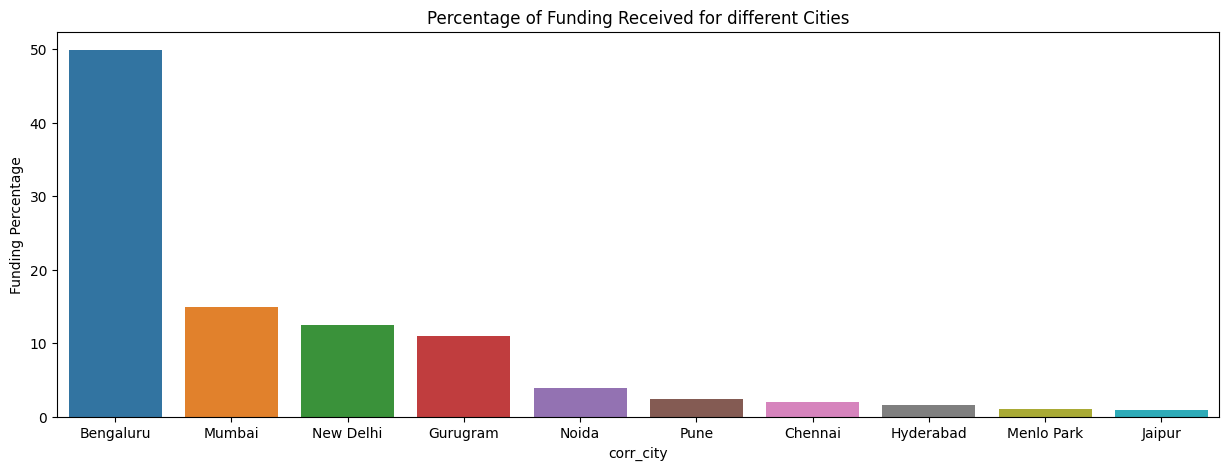

In [119]:
# Generating bar plot to visualize percentage of funding received for different cities

plt.figure(figsize=(15,5))
plt.xlabel("City")
plt.ylabel("Funding Percentage")
plt.title("Percentage of Funding Received for different Cities")
sns.barplot(x=topi,y=topv)
plt.show()

# Here, we see that startups in the city of Bengaluru received highest amount of fundings. This could be due to many reasons
# Some of which are:
# 1) Good weather year-round. 2) Availability of qualified human resource. 3) Availability of advanced technologies.


### Problem Statement-4:
#### There are mainly four different type of investments. Find out percentage of amount funded for each investment type.

In [120]:
df_stfund['inv_type'] = df_stfund['inv_type'].astype(str)

In [121]:
list(df_stfund['inv_type'].unique())

['Private Equity Round',
 'Series C',
 'Series B',
 'Pre-series A',
 'Seed Round',
 'Series A',
 'Series D',
 'Seed',
 'Series F',
 'Series E',
 'Debt Funding',
 'Series G',
 'Series H',
 'Venture',
 'Seed Funding',
 'nan',
 'Funding Round',
 'Corporate Round',
 'Maiden Round',
 'pre-series A',
 'Seed Funding Round',
 'Single Venture',
 'Venture Round',
 'Pre-Series A',
 'Angel',
 'Series J',
 'Angel Round',
 'pre-Series A',
 'Venture - Series Unknown',
 'Bridge Round',
 'Private Equity',
 'Debt and Preference capital',
 'Inhouse Funding',
 'Seed/ Angel Funding',
 'Debt',
 'Pre Series A',
 'Equity',
 'Debt-Funding',
 'Mezzanine',
 'Series B (Extension)',
 'Equity Based Funding',
 'Private Funding',
 'Seed / Angel Funding',
 'Seed/Angel Funding',
 'Seed funding',
 'Seed / Angle Funding',
 'Angel / Seed Funding',
 'Private',
 'Structured Debt',
 'Term Loan',
 'PrivateEquity',
 'Angel Funding',
 'Seed\\\\nFunding',
 'Private\\\\nEquity',
 'Crowd funding',
 'Crowd Funding']

In [122]:
df_stfund['inv_type'] = df_stfund['inv_type'].map(lambda x:x.replace('\\\\n',' '))

In [123]:
sorted(list(df_stfund['inv_type'].unique()))

['Angel',
 'Angel / Seed Funding',
 'Angel Funding',
 'Angel Round',
 'Bridge Round',
 'Corporate Round',
 'Crowd Funding',
 'Crowd funding',
 'Debt',
 'Debt Funding',
 'Debt and Preference capital',
 'Debt-Funding',
 'Equity',
 'Equity Based Funding',
 'Funding Round',
 'Inhouse Funding',
 'Maiden Round',
 'Mezzanine',
 'Pre Series A',
 'Pre-Series A',
 'Pre-series A',
 'Private',
 'Private Equity',
 'Private Equity Round',
 'Private Funding',
 'PrivateEquity',
 'Seed',
 'Seed / Angel Funding',
 'Seed / Angle Funding',
 'Seed Funding',
 'Seed Funding Round',
 'Seed Round',
 'Seed funding',
 'Seed/ Angel Funding',
 'Seed/Angel Funding',
 'Series A',
 'Series B',
 'Series B (Extension)',
 'Series C',
 'Series D',
 'Series E',
 'Series F',
 'Series G',
 'Series H',
 'Series J',
 'Single Venture',
 'Structured Debt',
 'Term Loan',
 'Venture',
 'Venture - Series Unknown',
 'Venture Round',
 'nan',
 'pre-Series A',
 'pre-series A']

In [124]:
df_stfund.loc[df_stfund[df_stfund['inv_type'].isin(['Private Equity Round','PrivateEquity','Private'])].index,'inv_type'] = 'Private Equity'
df_stfund.loc[df_stfund[df_stfund['inv_type'].isin(['Seed Round','Seed','Seed Funding Round','Seed funding'])].index,'inv_type'] = 'Seed Funding'
df_stfund.loc[df_stfund[df_stfund['inv_type'].isin(['Debt','Debt-Funding'])].index,'inv_type'] = 'Debt Funding'
df_stfund.loc[df_stfund[df_stfund['inv_type'].isin(['Crowd funding'])].index,'inv_type'] = 'Crowd Funding'

In [125]:
sorted(list(df_stfund['inv_type'].unique()))

['Angel',
 'Angel / Seed Funding',
 'Angel Funding',
 'Angel Round',
 'Bridge Round',
 'Corporate Round',
 'Crowd Funding',
 'Debt Funding',
 'Debt and Preference capital',
 'Equity',
 'Equity Based Funding',
 'Funding Round',
 'Inhouse Funding',
 'Maiden Round',
 'Mezzanine',
 'Pre Series A',
 'Pre-Series A',
 'Pre-series A',
 'Private Equity',
 'Private Funding',
 'Seed / Angel Funding',
 'Seed / Angle Funding',
 'Seed Funding',
 'Seed/ Angel Funding',
 'Seed/Angel Funding',
 'Series A',
 'Series B',
 'Series B (Extension)',
 'Series C',
 'Series D',
 'Series E',
 'Series F',
 'Series G',
 'Series H',
 'Series J',
 'Single Venture',
 'Structured Debt',
 'Term Loan',
 'Venture',
 'Venture - Series Unknown',
 'Venture Round',
 'nan',
 'pre-Series A',
 'pre-series A']

In [126]:
# Funding amount based on investment type

fund_type = df_stfund.groupby('inv_type')['correct_amt_USD'].sum()
fund_type4=fund_type[['Private Equity','Seed Funding','Debt Funding','Crowd Funding']]
fund_type4

inv_type
Private Equity    3.019384e+10
Seed Funding      7.244962e+09
Debt Funding      1.774550e+08
Crowd Funding     1.557680e+05
Name: correct_amt_USD, dtype: float64

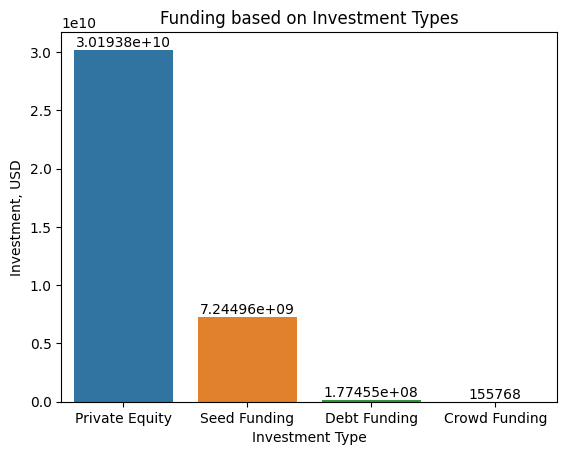

In [135]:
ax = sns.barplot(x=fund_type4.index,y=fund_type4)
plt.title("Funding based on Investment Types")
plt.xlabel("Investment Type")
plt.ylabel("Investment, USD")
ax.bar_label(ax.containers[0])
plt.show()

In [178]:
# Getting percentage of funding amount with respect to investment types
# Rounding to four digits to show the relatively smaller values for crowd funding

fund_type4_per = round(((fund_type4/sum(fund_type4))*100),4)
fund_type4_per

inv_type
Private Equity    80.2677
Seed Funding      19.2601
Debt Funding       0.4717
Crowd Funding      0.0004
Name: correct_amt_USD, dtype: float64

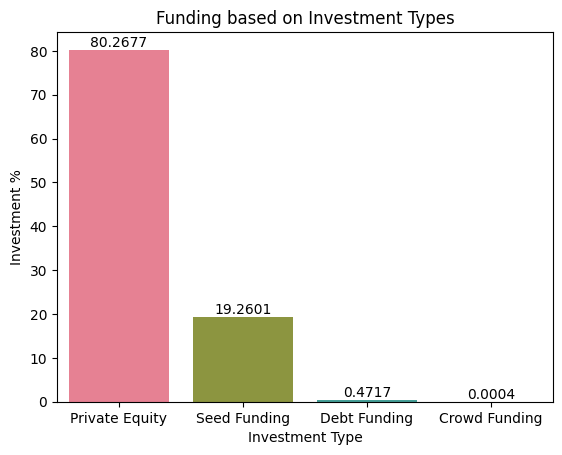

In [220]:
ax = sns.barplot(x=fund_type4_per.index,y=fund_type4_per, palette='husl')
plt.title("Funding based on Investment Types")
plt.xlabel("Investment Type")
plt.ylabel("Investment %")
ax.bar_label(ax.containers[0])
plt.show()

### Problem Statement-5:
#### Which type of companies got funding more easily?

In [193]:
# Correcting to Ecommerce

df_stfund.loc[df_stfund[df_stfund['inv_type'].isin(['E-Commerce'])].index,'inv_type'] = 'Ecommerce'

In [194]:
# Percentage of funding received by different industry verticals

fund_ind = df_stfund.groupby('industry_vert')['correct_amt_USD'].sum().sort_values(ascending=False).head(5)
fund_ind_per = round(((fund_ind/sum(fund_ind))*100),2)
fund_ind_per

industry_vert
E-Commerce           37.30
Consumer Internet    30.99
Transportation       14.41
Technology           10.66
Finance               6.65
Name: correct_amt_USD, dtype: float64

In [195]:
fund_ind

industry_vert
E-Commerce           1.203165e+10
Consumer Internet    9.995935e+09
Transportation       4.649866e+09
Technology           3.438066e+09
Finance              2.144431e+09
Name: correct_amt_USD, dtype: float64

Text(0.5, 1.0, 'Funding Amount (USD) Received by Industries')

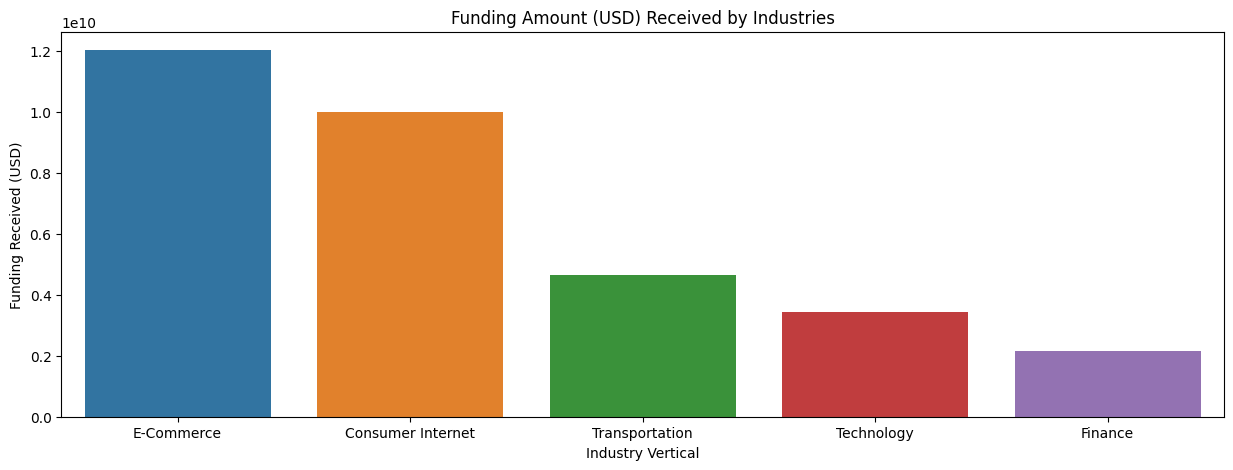

In [196]:
# Bar plot to visualize funding received by different industry verticals

plt.figure(figsize=(15,5))
sns.barplot(x=fund_ind.index,y=fund_ind.values)
plt.xlabel("Industry Vertical")
plt.ylabel("Funding Received (USD)")
plt.title("Funding Amount (USD) Received by Industries")
plt.show()

# Here, we see that E-Commerce sector received the highest amount of funding. This means that E-Commerce business
# has a high demand in the investors community.

### Problem Statement-6:
#### Find top 5 startups with most amount of total funding?

In [197]:
df_stfund.head()

,industry_vert,sr_no,date,startup_name,sub_vert,city,inv_name,inv_type,amt_USD,Remarks,correct_date,year,corr_city,correct_amt_USD,USD
0,E-Tech,1,09/01/2020,BYJU’S,E-learning,Bengaluru,Tiger Global Management,Private Equity,"20,00,00,000",NaN,2020-01-09,2020.0,Bengaluru,200000000.0,200000000.0
1,Transportation,2,13/01/2020,Shuttl,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,Gurugram,8048394.0,8048394.0
2,E-Commerce,3,09/01/2020,Mamaearth,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-01-09,2020.0,Bengaluru,18358860.0,18358860.0
3,FinTech,4,02/01/2020,https://www.wealthbucket.in/,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-01-02,2020.0,New Delhi,3000000.0,3000000.0
4,Fashion and Apparel,5,02/01/2020,Fashor,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN,2020-01-02,2020.0,Mumbai,1800000.0,1800000.0


In [198]:
df_stfund['startup_name'] = df_stfund['startup_name'].astype(str)
l = sorted(list(df_stfund['startup_name'].unique()))
print(*l, sep = "\n ")

"BYJU\\'S"
 #Fame
 121Policy
 19th mile
 1Crowd
 1mg
 1mg (Healthkartplus)
 20Dresses
 33Coupons
 360Ride
 3Dexter
 3HCare
 3rdFlix
 48East
 4tigo
 5th Vital
 6Degree
 75F
 91SpringBoard
 99Games
 99PerHour
 9Stacks
 A&R Bon Vivants
 ABI Health
 AEON Learning
 AHA Taxis
 AYE Finance
 AadharAPI.com
 Aadyah
 Aahaa
 Aahaa Stores
 Aarav UAV
 Aasaanjobs
 Aashiyaan
 Aavishkaar-Intellecap Group
 AbeRuk
 Abhibus
 Absentia
 Absentia VR
 Ace Turtle
 Ace2three
 Acko
 ActOnMagic
 Actionable Analytics
 Active AI
 Active.ai
 Actofit
 Ad2pro
 AdPushUp
 AdStringO
 AdUrCup
 AdWyze
 Address Health
 AdmitKard
 Advanced Structures India
 Advantage Club
 Advenio
 Adytude
 Aequm
 AerMed
 Affimity
 Affordplan
 Agara Labs
 AgentDesks
 Agricxlab
 Agrostar
 Agrowave
 AirCTO
 AirMed Labs
 AirZaar
 Airpay
 Airwood
 Aisle
 Aisle.co
 Akosha
 Alef\\nMobitech
 AllIzHealth
 Allygrow Technologies
 AlmaConnect
 AlmaMapper
 Alpha Capital
 Alteria Capital
 Alternacare
 Altizone
 Amagi Media Labs
 Ambee
 American Vision
 A

In [199]:
df_stfund['startup_name'] = df_stfund['startup_name'].map(lambda x:x.replace('\\\\xe2\\\\x80\\\\x99',''))
df_stfund['startup_name'] = df_stfund['startup_name'].map(lambda x:x.replace('\\\\n',' '))
df_stfund['startup_name'] = df_stfund['startup_name'].map(lambda x:x.replace('\\xc2\\xa0',' '))
df_stfund['startup_name'] = df_stfund['startup_name'].map(lambda x:x.replace("\\\\\'",''))


In [200]:
df_stfund.loc[df_stfund[df_stfund['startup_name'].isin(['Flipkart.com'])].index,'startup_name'] = 'Flipkart'
df_stfund.loc[df_stfund[df_stfund['startup_name'].isin(['Oyo Rooms','OyoRooms','Oyorooms'])].index,'startup_name'] = 'Oyo'
df_stfund.loc[df_stfund[df_stfund['startup_name'].isin(['Ola Cabs','Ola Electric','Olacabs'])].index,'startup_name'] = 'Ola'
df_stfund.loc[df_stfund[df_stfund['startup_name'].isin(['Paytm Marketplace'])].index,'startup_name'] = 'Paytm'
df_stfund.loc[df_stfund[df_stfund['startup_name'].isin(['Rapido Bike Taxi'])].index,'startup_name'] = 'Rapido'

In [201]:
fund_stup = df_stfund.groupby('startup_name')['correct_amt_USD'].sum().sort_values(ascending=False).head(6)
fund_stup

startup_name
Flipkart    4.759700e+09
Rapido      3.911351e+09
Paytm       3.348950e+09
Ola         2.860433e+09
Udaan       8.700000e+08
Oyo         7.120000e+08
Name: correct_amt_USD, dtype: float64

In [202]:
# Startups which received most fundings

lis_st=list(fund_stup.index)
for i in lis_st:
    print(i)

Flipkart
Rapido
Paytm
Ola
Udaan
Oyo


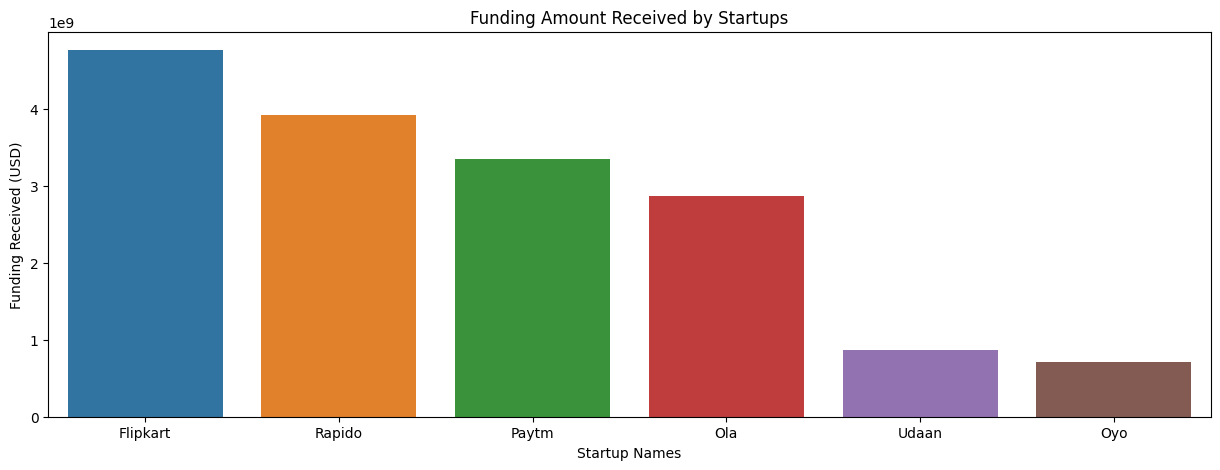

In [215]:
# Bar plot for startups which received most fundings

plt.figure(figsize=(15,5))
sns.barplot(x=fund_stup.index,y=fund_stup.values)
plt.xlabel("Startup Names")
plt.ylabel("Funding Received (USD)")
plt.title("Funding Amount Received by Startups")
plt.show()

# Here, we see that Flipkart received the highest amount of funding.

### Problem Statement-7:
#### Find the top 5 startups who received the most number of funding rounds?

In [212]:
# Number of funding rounds for top startups

fund_count = df_stfund.groupby('startup_name')['startup_name'].count().sort_values(ascending=False).head(5)
fund_count

startup_name
Ola       14
Swiggy     8
Paytm      8
Meesho     6
Nykaa      6
Name: startup_name, dtype: int64

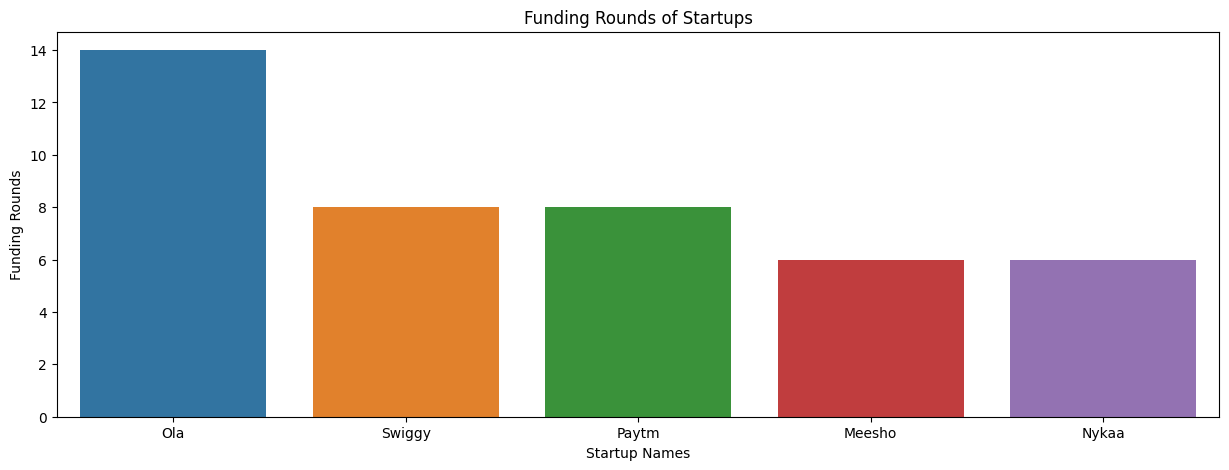

In [214]:
# Bar plot to visualize number of funding rounds for top startups

plt.figure(figsize=(15,5))
sns.barplot(x=fund_count.index,y=fund_count.values)
plt.xlabel("Startup Names")
plt.ylabel("Funding Rounds")
plt.title("Funding Rounds of Startups")
plt.show()

# Here, we see that Ola received maximum rounds of funding.

### Problem Statement-8
#### Find the location where startups have received funding maximum number of times?

In [207]:
# New column is created which is a copy of existing column corr_city to perform consolidation
df_stfund['city_cons'] = df_stfund['corr_city']

In [208]:
# Here, the name of New Delhi, Gurugram, and Noida is replaced with NCR, which stands for Northern Capital Region.
df_stfund.loc[df_stfund[df_stfund['city_cons'].isin(['New Delhi','Gurugram','Noida'])].index,'city_cons'] = 'NCR'

In [209]:
# Finding the top 10 cities/consolidated cities by funding rounds. Here, the percentage of funding rounds is generated
# which is based on the top 10.

fund_city_cons = df_stfund.groupby('city_cons')['city_cons'].count() # Getting the count of funding received by consolidated city names

top_ten_city_cons = fund_city_cons.sort_values(ascending=False).head(10) # Sorting the values in descending order and getting top 10

top_ten_city_cons_per = round(((top_ten_city_cons/top_ten_city_cons.sum())*100),2) # Getting the percentage of count of funding for different cities
top_ten_city_cons_per

city_cons
NCR          32.77
Bengaluru    31.14
Mumbai       20.87
Pune          4.08
Hyderabad     3.68
Chennai       3.61
Ahmedabad     1.49
Jaipur        1.09
Kolkata       0.80
Indore        0.47
Name: city_cons, dtype: float64

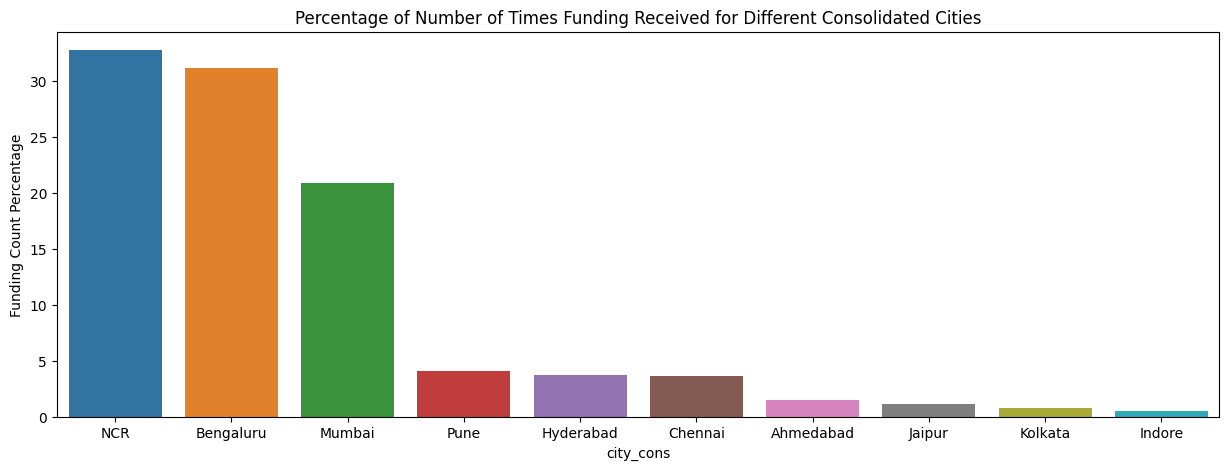

In [210]:
# Creating bar plot

plt.figure(figsize=(15,5))
plt.xlabel("City")
plt.ylabel("Funding Count Percentage")
plt.title("Percentage of Number of Times Funding Received for Different Consolidated Cities")
sns.barplot(x=top_ten_city_cons_per.index,y=top_ten_city_cons_per.values)
plt.show()

# Here, it can be seen that NCR is the city which received the highest number of fundings followed by Bengaluru and then Mumbai.
# Therefore, the best location is NCR, which is the combination of New Delhi, Gurugram and Noida.